In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.spatial import distance
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1 import make_axes_locatable
import string

In [2]:
## Model structure
Mt = 40
Nt = 20

Ma = 20
Na = 3

Mm = 1
Nm = 1

## Model parameters

# Unisensory receptive fields
phit_0 = 1
sigmat_phi = 0.5
phia_0 = 1
sigmaa_phi = 10

# External stimuli
it_0 = 2.5
sigmat_i = 0.3
sigmat_v = 0.1
xt_0 = 10 
yt_0 = 5

ia_0 = 3.6
sigmaa_i = 0.3
sigmaa_v = 0.4
ya_0 = 5
xa_0 = 100

tt_0 = 0
ta_0 = 0

In [3]:
## Receptive fields

# Tactile RF centres
xt = np.arange(1,Mt+1)*0.5 # originally was from 1 to Mt+1 
yt = np.arange(1,Nt+1)*0.5

# Auditory RF centres
xa = (np.arange(1,Ma+1)*10)-5
ya = (np.arange(1,Na+1)*10)-15
              
def phit(x,y):
    phi = np.zeros((Mt,Nt))
    for i in range(Mt):
        for j in range(Nt):
            phi[i][j] = phit_0*np.exp(-((np.square(xt[i]-x)+np.square(yt[j]-y))/(2*np.square(sigmat_phi))))
    return phi

def phia(x,y):
    phi = np.zeros((Ma,Na))
    for i in range(Ma):
        for j in range(Na):
            phi[i][j] = phia_0*np.exp(-((np.square(xa[i]-x)+np.square(ya[j]-y))/(2*np.square(sigmaa_phi))))
    return phi

# Calculation
dif = 0.2 # originally 0.2
xt_i = np.arange(0,20+dif,dif)
yt_n = np.arange(0,10+dif,dif)

phi_t = np.zeros((Mt,Nt,len(xt_i),len(yt_n)))        
for k in range(len(xt_i)):
    for l in range(len(yt_n)):
        phi_t[:,:,k,l] = phit(xt_i[k],yt_n[l])
        
xa_i = np.arange(0,200+dif,dif)
ya_n = np.arange(0,30+dif,dif)

phi_a = np.zeros((Ma,Na,len(xa_i),len(ya_n)))        
for k in range(len(xa_i)):
    for l in range(len(ya_n)):
        phi_a[:,:,k,l] = phia(xa_i[k],ya_n[l])
        
        

In [4]:
## External stimulus
def stimt(x,y,t):
    if t<tt_0: 
        I = 0
    else: 
        v = np.random.normal(0, sigmat_v)
        I = (it_0+sigmat_v*v)*np.exp(- (np.square(xt_0-x)+np.square(yt_0-y))/(2*np.square(sigmat_i)))
    return I 

def stima(x,y,t):
    if t<ta_0: 
        I = 0
    else: 
        v = np.random.normal(0, sigmaa_v)
        I = (ia_0+sigmaa_v*v)*np.exp(- (np.square(xa_0-x)+np.square(ya_0-y))/(2*np.square(sigmaa_i)))
    return I 

In [5]:
## Unisensory input

def PHIt(t):

        PHI = np.zeros((Mt,Nt,len(xt_i),len(yt_n)))        
        
        for k in range(len(xt_i)):
            for l in range(len(yt_n)):
                PHI[:,:,k,l] = np.multiply(phi_t[:,:,k,l],stimt(xt_i[k],yt_n[l],t))
        PHI = np.sum(PHI,axis=3)
        PHI = np.sum(PHI,axis=2)
        
        return PHI
    
def PHIa(t):

        PHI = np.zeros((Ma,Na,len(xa_i),len(ya_n)))        
        
        for k in range(len(xa_i)):
            for l in range(len(ya_n)):
                PHI[:,:,k,l] = np.multiply(phi_a[:,:,k,l],stima(xa_i[k],ya_n[l],t))
        PHI = np.sum(PHI,axis=3)
        PHI = np.sum(PHI,axis=2)
        
        return PHI

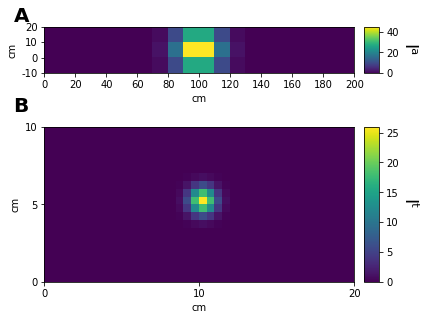

In [6]:
## Plot stimuli
PHI1 = PHIa(10).transpose()
PHI1 = np.flip(PHI1,1)

PHI2 = PHIt(10).transpose()
PHI2 = np.flip(PHI2,1)


fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(6,6));

ax1 = plt.subplot(211)
im1 = ax1.imshow(PHI1)
ax1.set_ylabel('cm')
ax1.set_xlabel('cm')
ax1.set_xticks(np.arange(-.5, 21, 2))
ax1.set_yticks(np.arange(-.5, 3, 1))
ax1.set_xticklabels(np.arange(0, 210, 20))
ax1.set_yticklabels(np.arange(-10, 21, 10)[::-1])
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = fig.colorbar(im1,cax=cax)
cbar.ax.get_yaxis().labelpad = 18
cbar.ax.set_ylabel('I\u1D43', rotation=270,size=18)
ax1.text(-0.1, 1.1, string.ascii_uppercase[0], transform=ax1.transAxes, 
            size=20, weight='bold')

ax2 = plt.subplot(212)
im2 = ax2.imshow(PHI2)
ax2.set_ylabel('cm')
ax2.set_xlabel('cm')
ax2.set_xticks(np.arange(-.5, 41, 20))
ax2.set_yticks(np.arange(-.5, 21, 10))
ax2.set_xticklabels(np.arange(0, 30, 10))
ax2.set_yticklabels(np.arange(0, 15, 5)[::-1])
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = fig.colorbar(im2,cax=cax)
cbar.ax.get_yaxis().labelpad = 18
cbar.ax.set_ylabel('I\u1D57', rotation=270,size=18)
ax2.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax2.transAxes, 
            size=20, weight='bold')

fig.subplots_adjust(hspace=-.10)

plt.savefig('networkstim.png', bbox_inches='tight')

In [7]:
## Lateral connections in unisensory areas

# Parameters
Lt_ex = 0.15 #0.15
Lt_in = 0.05 #0.05
sigmat_ex = 1
sigmat_in = 4

La_ex = 0.15 #0.15
La_in = 0.05 #0.05
sigmaa_ex = 20
sigmaa_in = 80

# Tactile Connections
Lt = np.zeros((Mt*Nt,Mt*Nt))

for i in range(Mt*Nt):
    for j in range(Mt*Nt):
        if i==j: 
            Lt[i,j] = 0
        else:
            Dtx = xt[np.floor_divide(i,Nt)] - xt[np.floor_divide(j,Nt)]
            Dty = yt[np.remainder(i,Nt)] - yt[np.remainder(j,Nt)]
            Lt[i,j] = Lt_ex*np.exp(- (np.square(Dtx)+np.square(Dty))/(2*np.square(sigmat_ex)))-Lt_in*np.exp(- (np.square(Dtx)+np.square(Dty))/(2*np.square(sigmat_in)))

# Auditory Connections
La = np.zeros((Ma*Na,Ma*Na))

for i in range(Ma*Na):
    for j in range(Ma*Na):
        if i==j: 
            La[i,j] = 0
        else:
            Dax = xa[np.floor_divide(i,Na)] - xa[np.floor_divide(j,Na)]
            Day = ya[np.remainder(i,Na)] - ya[np.remainder(j,Na)] #before was remainder-1
            La[i,j] = La_ex*np.exp(- (np.square(Dax)+np.square(Day))/(2*np.square(sigmaa_ex)))-La_in*np.exp(- (np.square(Dax)+np.square(Day))/(2*np.square(sigmaa_in)))

# Lateral inputs
def LIt(z):
    # z is a matrix of MtxNt dimensions
    LI = np.zeros(Mt*Nt)
    z = np.reshape(z,(1,Mt*Nt))
    for i in range(Mt*Nt):
            LI[i] = np.sum(np.multiply(Lt[i,:],z[0,:])) 
    LI = np.reshape(LI,(Mt,Nt))
    return LI

def LIa(z):
    # z is a matrix of MtxNt dimensions
    LI = np.zeros(Ma*Na)
    z = np.reshape(z,(1,Ma*Na))
    for i in range(Ma*Na):
            LI[i] = np.sum(np.multiply(La[i,:],z[0,:])) 
    LI = np.reshape(LI,(Ma,Na))
    return LI

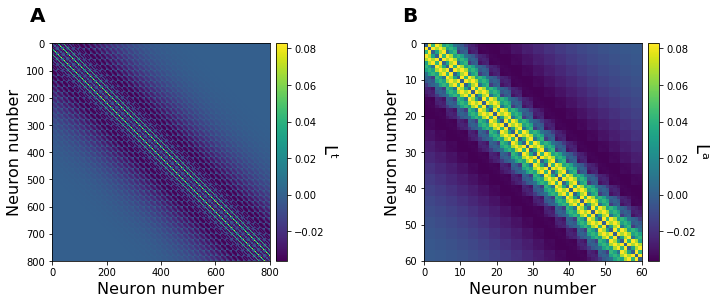

In [84]:
# Plot recurrent connections weights

fig, (ax1,ax2) = plt.subplots(1,2,sharex=True,figsize=(12,4));
fig.subplots_adjust(wspace = 0.75, hspace = 0.5)

ax1 = plt.subplot(121)
im1 = ax1.imshow(Lt)
ax1.set_xlabel('Neuron number',size=16)
ax1.set_ylabel('Neuron number',size=16)
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = fig.colorbar(im1,cax=cax)
cbar.ax.get_yaxis().labelpad = 12
cbar.ax.set_ylabel('L\u1D57', rotation=270,size=18)
ax1.text(-0.1, 1.1, string.ascii_uppercase[0], transform=ax1.transAxes, 
            size=20, weight='bold')

ax2 = plt.subplot(122)
im2 = ax2.imshow(La)
plt.xlabel('Neuron number',size=16)
plt.ylabel('Neuron number',size=16)
ax2.set_xticks(np.arange(-.5, 61, 10))
ax2.set_yticks(np.arange(-.5, 61, 10))
ax2.set_xticklabels(np.arange(0, 61, 10))
ax2.set_yticklabels(np.arange(0, 61, 10))
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = fig.colorbar(im2,cax=cax)
cbar.ax.get_yaxis().labelpad = 12
cbar.ax.set_ylabel('L\u1D43', rotation=270,size=18)
ax2.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax2.transAxes, 
            size=20, weight='bold')

fig.subplots_adjust(wspace=.25)

plt.savefig('recsynapses.png', bbox_inches='tight')


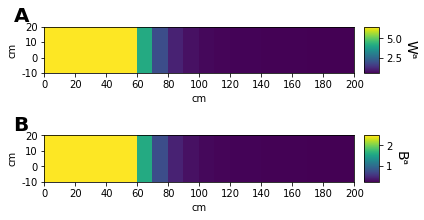

In [7]:
## Feedforward and feedback synapses

Wt_0 = 6.5
Wa_0 = 6.5

Bt_0 = 2.5
Ba_0 = 2.5

k1 = 10 #cm
k2 = 700 #cm
alpha = 0.9

# Tactile connections
Bt = np.ones((Mt,Nt))*Bt_0
Wt = np.ones((Mt,Nt))*Wt_0

# Auditory connections
Ba = np.zeros((Ma,Na))
Wa = np.zeros((Ma,Na))

for i in range(Ma):
    for j in range(Na):
        if (xa[i]<60) & (ya[j]<20): # Double check. Should be 60.
            D = 0
        else: 
            D = distance.euclidean((xa[i],ya[j]),(60,ya[j]))              
        Ba[i,j] = alpha*Ba_0*np.exp(- D/k1)+(1-alpha)*Ba_0*np.exp(- D/k2)
        Wa[i,j] = alpha*Wa_0*np.exp(- D/k1)+(1-alpha)*Wa_0*np.exp(- D/k2)

# Feedback inputs
def bt(z):
    #bt = np.zeros(Mt,Nt)
    bt = np.multiply(Bt,z)
    return bt

def ba(z):
    #bt = np.zeros(Mt,Nt)
    ba = np.multiply(Ba,z)
    return ba

# Plot feedforward and feedback weights

fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(6,6));

ax1 = plt.subplot(211)
im1 = ax1.imshow(Wa.transpose())
ax1.set_ylabel('cm')
ax1.set_xlabel('cm')
ax1.set_xticks(np.arange(-.5, 21, 2))
ax1.set_yticks(np.arange(-.5, 3, 1))
ax1.set_xticklabels(np.arange(0, 210, 20))
ax1.set_yticklabels(np.arange(-10, 21, 10)[::-1])
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = fig.colorbar(im1,cax=cax)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('W\u1D43', rotation=270,size=14)
ax1.text(-0.1, 1.1, string.ascii_uppercase[0], transform=ax1.transAxes, 
            size=20, weight='bold')

ax2 = plt.subplot(212)
im2 = ax2.imshow(Ba.transpose())
ax2.set_ylabel('cm')
ax2.set_xlabel('cm')
ax2.set_xticks(np.arange(-.5, 21, 2))
ax2.set_yticks(np.arange(-.5, 3, 1))
ax2.set_xticklabels(np.arange(0, 210, 20))
ax2.set_yticklabels(np.arange(-10, 21, 10)[::-1])
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", "5%", pad="3%")
cbar = fig.colorbar(im2,cax=cax)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('B\u1D43', rotation=270,size=14)
ax2.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax2.transAxes, 
            size=20, weight='bold')

fig.subplots_adjust(hspace=-.5)

plt.savefig('ffsynapses.png', bbox_inches='tight')


In [10]:
## Neuron activity in unisensory areas

ft_min = -0.12
ft_max = 1
qt_c = 19.43
rt = 0.34

fa_min = -0.12
fa_max = 1
qa_c = 19.43
ra = 0.34

tau = 20 #ms

def psit(qt):
    y = qt
    for i in range(Mt):
        for j in range(Nt):
            y[i,j] = (ft_min+ft_max*np.exp((qt[i,j]-qt_c)*rt))/(1+np.exp((qt[i,j]-qt_c)*rt))
    return y

def psia(qa):
    y = qa
    for i in range(Ma):
        for j in range(Na):
            y[i,j] = (fa_min+fa_max*np.exp((qa[i,j]-qa_c)*ra))/(1+np.exp((qa[i,j]-qa_c)*ra))
    return y


## Multisensory neuron activity

fm_min = 0
fm_max = 1
qm_c = 12
rm = 0.6

def psim(qm):
    y = (fm_min+fm_max*np.exp((qm-qm_c)*rm))/(1+np.exp((qm-qm_c)*rm))
    return y



In [25]:
## Simulation run. Replication of Serino et al. 2015. Sound only

# Initial setup
time = 400 #ms
dt = 0.4 #ms

timesteps = int(time/dt)

qt = np.zeros((Mt,Nt,timesteps+1))
ut = np.zeros((Mt,Nt,timesteps+1))
zt = np.zeros((Mt,Nt,timesteps+1))
pt = np.zeros((Mt,Nt,timesteps+1))

qa = np.zeros((Ma,Na,timesteps+1))
ua = np.zeros((Ma,Na,timesteps+1))
za = np.zeros((Ma,Na,timesteps+1))
pa = np.zeros((Ma,Na,timesteps+1))

qm = np.zeros(timesteps+1)
um = np.zeros(timesteps+1)
zm = np.zeros(timesteps+1)
pm = np.zeros(timesteps+1)

a_distances = np.arange(20,170,10)
trials = 1

mres = np.zeros((trials,len(a_distances)))

# Run
for r in range(trials):
    
    mstate = []
    
    for d in a_distances:
        
        xa_0 = d # How far the sound is presented.     
        ti = 0 # Generates a tactile input
        ai = PHIa(0) # Generates a auditory input
        
        for i in range(timesteps):    
            # Tactile activity
            ut[:,:,i+1] = ti+LIt(zt[:,:,i])+bt(zm[i])
            qt[:,:,i+1] = qt[:,:,i] + dt/tau*(-qt[:,:,i]+ut[:,:,i])
            pt[:,:,i+1] = psit(qt[:,:,i])
            zt[:,:,i+1] = pt[:,:,i]*np.heaviside(pt[:,:,i],0)

            # Auditory activity
            ua[:,:,i+1] = ai+LIa(za[:,:,i])+ba(zm[i]) 
            qa[:,:,i+1] = qa[:,:,i] + dt/tau*(-qa[:,:,i]+ua[:,:,i])
            pa[:,:,i+1] = psia(qa[:,:,i])
            za[:,:,i+1] = pa[:,:,i]*np.heaviside(pa[:,:,i],0)

            # Multisensory activity
            um[i+1] = np.sum(np.multiply(Wt,zt[:,:,i])) + np.sum(np.multiply(Wa,za[:,:,i]))
            qm[i+1] = qm[i] + dt/tau*(-qm[i]+um[i])
            pm[i+1] = psim(qm[i])
            zm[i+1] = pm[i]*np.heaviside(pm[i],0)    

        mstate.append(zm[timesteps])
    mres[r,:] = mstate
avg = np.mean(mres,axis=0)

In [ ]:
## Simulation run. Replication of Serino et al. 2015. Multisensory conditions. 

# Initial setup
time = 400 #ms
dt = 0.4 #ms

timesteps = int(time/dt)

a_distances = np.arange(20,170,10)
trials = 1

RTs = np.zeros((trials,len(a_distances)))

for r in range(trials):
    
    rts = []
    
    for d in a_distances:
        
        qt = np.zeros((Mt,Nt,timesteps+1))
        ut = np.zeros((Mt,Nt,timesteps+1))
        zt = np.zeros((Mt,Nt,timesteps+1))
        pt = np.zeros((Mt,Nt,timesteps+1))

        qa = np.zeros((Ma,Na,timesteps+1))
        ua = np.zeros((Ma,Na,timesteps+1))
        za = np.zeros((Ma,Na,timesteps+1))
        pa = np.zeros((Ma,Na,timesteps+1))

        qm = np.zeros(timesteps+1)
        um = np.zeros(timesteps+1)
        zm = np.zeros(timesteps+1)
        pm = np.zeros(timesteps+1)
        
        xa_0 = d # How far the sound is presented.     
        ti = PHIt(0) # Generates a tactile input
        ai = PHIa(0) # Generates a auditory input
        ZT = np.zeros(timesteps+1)
        
        for i in range(timesteps):    
            # Tactile activity
            ut[:,:,i+1] = ti+LIt(zt[:,:,i])+bt(zm[i])
            qt[:,:,i+1] = qt[:,:,i] + dt/tau*(-qt[:,:,i]+ut[:,:,i])
            pt[:,:,i+1] = psit(qt[:,:,i])
            zt[:,:,i+1] = pt[:,:,i]*np.heaviside(pt[:,:,i],0)
            
            ZT[i+1] = np.sum(zt[:,:,i])

            # Auditory activity
            ua[:,:,i+1] = ai+LIa(za[:,:,i])+ba(zm[i]) 
            qa[:,:,i+1] = qa[:,:,i] + dt/tau*(-qa[:,:,i]+ua[:,:,i])
            pa[:,:,i+1] = psia(qa[:,:,i])
            za[:,:,i+1] = pa[:,:,i]*np.heaviside(pa[:,:,i],0)

            # Multisensory activity
            um[i+1] = np.sum(np.multiply(Wt,zt[:,:,i])) + np.sum(np.multiply(Wa,za[:,:,i]))
            qm[i+1] = qm[i] + dt/tau*(-qm[i]+um[i])
            pm[i+1] = psim(qm[i])
            zm[i+1] = pm[i]*np.heaviside(pm[i],0)    

        RT = dt*(np.abs(ZT - ZT[timesteps]*0.9)).argmin()
        #RT = dt*np.argmax(ZT>ZT[0,timesteps]*0.9)
        rts.append(RT)
    RTs[r,:] = rts



In [ ]:
## Fit to sigmoid to find central point and slope.

sigpar = []

for i in range(len(RTs)):
    def RTsig(d,etamin,etamax,dc,h):
        y = (etamin+etamax*np.exp((d-dc)*h))/(1+np.exp((d-dc)*h))
        return y
    
    #popt, pcov = curve_fit(RTsig, t, SCZ[i],p0=[1350,-0.1],bounds=([0, -1],[2700, 1]))
    popt, pcov = curve_fit(RTsig, a_distances-20, RTs[i,:],bounds=([0,0,0,0],[100,200,200,1]))
    sigpar.append(popt)

etamin = [item[0] for item in sigpar]
etamax = [item[1] for item in sigpar]
dc = [item[2] for item in sigpar] 
h = [item[3] for item in sigpar]

## Plot results of simulation
tp = np.linspace(0, 145, 100)

plt.figure(10)
plt.xlabel('Sound distance from hand (cm)',size=12)
plt.ylabel('Average RT (ms)',size=12)
plt.plot(tp, RTsig(tp,np.mean(etamin),np.mean(etamax),np.mean(dc),np.mean(h)), color='black',label = 'Sigmoid Fit')
plt.scatter(a_distances-20,np.mean(RTs,axis=0),color='black',label = 'Data')
plt.legend()
plt.savefig('multisensory30.png', bbox_inches='tight')

print(np.mean(dc),np.mean(h))

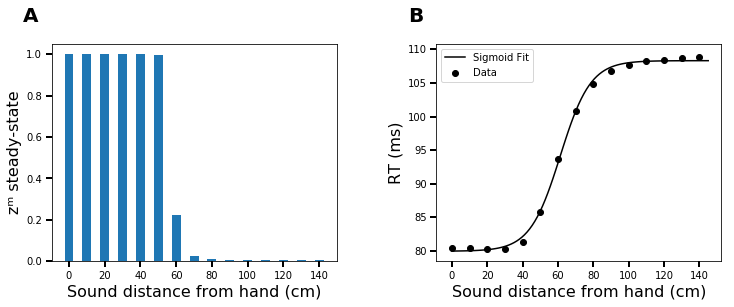

In [86]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

ax1 = plt.subplot(121)

ax1.bar(a_distances-20,avg,width=5)
ax1.set_xlabel('Sound distance from hand (cm)',size=16)
ax1.set_ylabel('z\u1d50 steady-state',size=16)
ax1.tick_params(length=6, width=2,labelsize = 'medium')
ax1.text(-0.1, 1.1, string.ascii_uppercase[0], transform=ax1.transAxes, 
            size=20, weight='bold')

ax2 = plt.subplot(122)

ax2.set_xlabel('Sound distance from hand (cm)',size=16)
ax2.set_ylabel('RT (ms)',size=16)
ax2.plot(tp, RTsig(tp,np.mean(etamin),np.mean(etamax),np.mean(dc),np.mean(h)), color='black',label = 'Sigmoid Fit')
ax2.scatter(a_distances-20,np.mean(RTs,axis=0),color='black',label = 'Data')
ax2.legend()
ax2.tick_params(length=6, width=2,labelsize = 'medium')
ax2.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax2.transAxes, 
            size=20, weight='bold')

fig.subplots_adjust(wspace=.35)

plt.savefig('networkevaluation.png', bbox_inches='tight')